In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
sns.set_style('darkgrid')

In [2]:
train_data=pd.read_csv('Train.csv')
df=train_data.copy()

In [3]:
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [4]:
df.shape

(3506, 9)

In [5]:
df['CONSOLE'].value_counts()

ps2     585
x360    448
ps3     438
pc      315
x       266
wii     254
ds      246
psp     180
gc      164
gba     129
ps4     121
xone     85
3ds      84
ps       83
psv      59
wiiu     45
dc        4
Name: CONSOLE, dtype: int64

In [6]:
df['CATEGORY'].value_counts()

action          845
sports          464
shooter         441
role-playing    380
racing          296
misc            220
platform        218
fighting        187
simulation      150
strategy        132
adventure       114
puzzle           59
Name: CATEGORY, dtype: int64

In [7]:
df['PUBLISHER'].value_counts()

Electronic Arts                           497
Activision                                289
Ubisoft                                   250
Nintendo                                  185
Thq                                       173
Sony Computer Entertainment               159
Take-Two Interactive                      136
Sega                                      134
Konami Digital Entertainment              111
Namco Bandai Games                        108
Atari                                      86
Microsoft Game Studios                     86
Warner Bros. Interactive Entertainment     85
Capcom                                     79
Square Enix                                70
Tecmo Koei                                 66
Midway Games                               58
Vivendi Games                              57
Eidos Interactive                          55
Codemasters                                50
Disney Interactive Studios                 41
Lucasarts                         

In [8]:
df['RATING'].value_counts()

T       1182
E       1061
M        749
E10+     511
RP         2
K-A        1
Name: RATING, dtype: int64

In [9]:
df=df[df['RATING']!='K-A']

In [10]:
df.shape

(3505, 9)

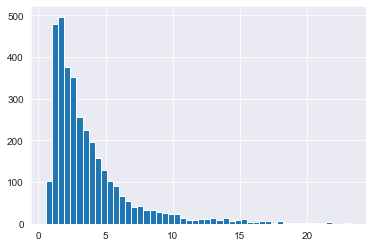

In [13]:
df['CRITICS_POINTS'].hist(bins=50)

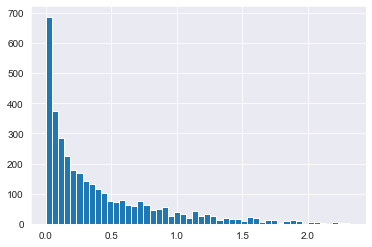

In [14]:
df['USER_POINTS'].hist(bins=50)

In [17]:
import re
def preprocess_text(data):
    text=str(data).lower()
    text=re.sub(r'[^a-z0-9]',' ',text)
    text=re.sub('/s+',' ',text)
    return text
df['CATEGORY']=df['CATEGORY'].apply(preprocess_text)
df['PUBLISHER']=df['PUBLISHER'].apply(preprocess_text)

In [18]:
#Combining The TExtual Features--->
df['GAME_INFO']=df['CONSOLE']+' '+df['CATEGORY']+' '+df['RATING']

In [19]:
df.drop(['CONSOLE','CATEGORY','RATING'],1,inplace=True)

In [20]:
df.head()

,ID,YEAR,PUBLISHER,CRITICS_POINTS,USER_POINTS,SalesInMillions,GAME_INFO
0,2860,2008,nintendo,2.833333,0.303704,1.779257,ds role playing E
1,731,2012,konami digital entertainment,13.200000,1.640000,0.215050,wii simulation E10+
2,495,2019,activision,4.562500,0.006410,0.534402,pc shooter M
3,2641,2002,electronic arts,4.181818,0.326923,1.383964,ps2 sports E
4,811,2013,activision,2.259259,0.032579,0.082671,ps3 action M


In [22]:
df.drop('ID',1,inplace=True)

In [23]:
#transforming the Skewed data to a normal distribution !!!

In [24]:
import scipy.stats as stat
from matplotlib import pylab
from pylab import *

In [25]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) #1 row 2 columns
    df[feature].hist()
    plt.subplot(1,2,2) #1st row 2nd column 2nd index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

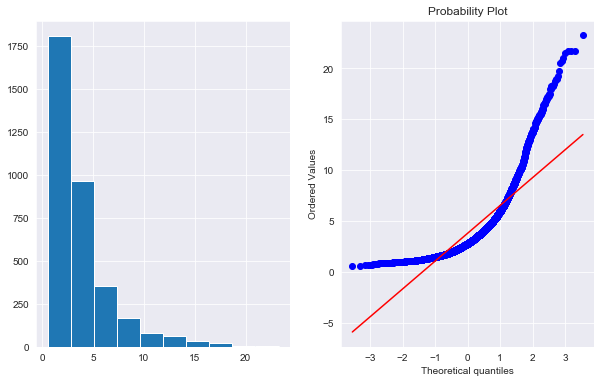

In [26]:
plot_data(df,'CRITICS_POINTS')

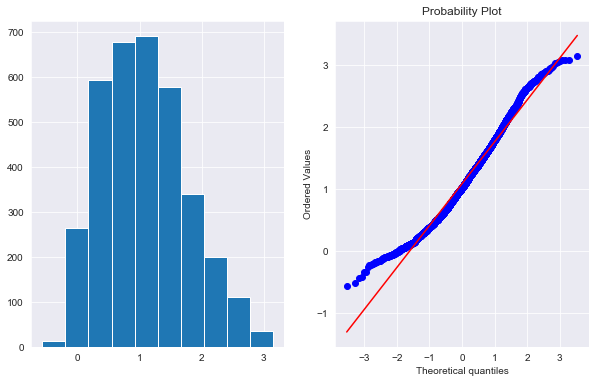

In [27]:

import numpy as np
df['Critics_log']=np.log(df['CRITICS_POINTS'])
plot_data(df,'Critics_log')

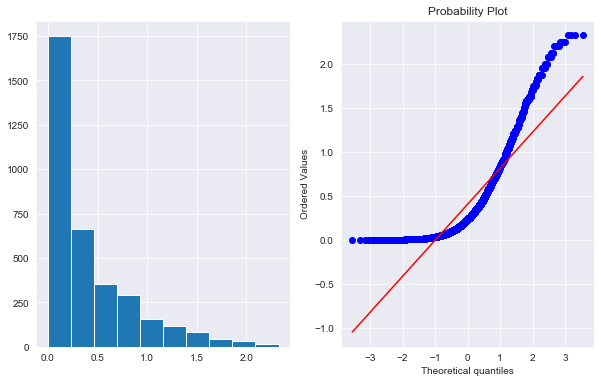

In [28]:
plot_data(df,'USER_POINTS')

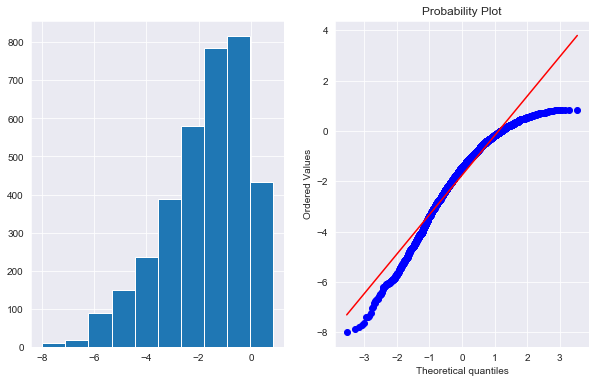

In [29]:
import numpy as np
df['Users_log']=np.log(df['USER_POINTS'])
plot_data(df,'Users_log')

In [30]:
df.drop(['CRITICS_POINTS','USER_POINTS'],1,inplace=True)

In [31]:
df.head()

,YEAR,PUBLISHER,SalesInMillions,GAME_INFO,Critics_log,Users_log
0,2008,nintendo,1.779257,ds role playing E,1.041454,-1.191703
1,2012,konami digital entertainment,0.215050,wii simulation E10+,2.580217,0.494696
2,2019,activision,0.534402,pc shooter M,1.517871,-5.049856
3,2002,electronic arts,1.383964,ps2 sports E,1.430746,-1.118030
4,2013,activision,0.082671,ps3 action M,0.815037,-3.424082


In [32]:
df.isnull().sum()

YEAR               0
PUBLISHER          0
SalesInMillions    0
GAME_INFO          0
Critics_log        0
Users_log          0
dtype: int64

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer(ngram_range=(1,2),lowercase=True)
tf2=TfidfVectorizer(ngram_range=(1,3),lowercase=True)
game_info=tf1.fit_transform(df['GAME_INFO']).toarray()
publisher=tf2.fit_transform(df['PUBLISHER']).toarray()

In [34]:
df_num=df[['YEAR','Critics_log','Users_log']]
df_num=np.array(df_num)

In [35]:
X=np.concatenate((df_num,game_info,publisher),1)
y=df.SalesInMillions

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(max_features='log2',n_estimators=500,verbose=1,n_jobs=-1)
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


0.902391132477723

In [41]:
from sklearn import metrics
y_pred=reg.predict(X_test)
metrics.r2_score(y_test,y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


0.20533615080389722

In [42]:
from math import sqrt 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [43]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 200,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_test)
print('RMSE:', sqrt(mean_squared_error(y_test,y_pred_lgbm)))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1508
[LightGBM] [Info] Number of data points in the train set: 2628, number of used features: 197
[LightGBM] [Info] Start training from score 2.156968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.01, n_estimators=1500, random_state=42, subsample=0.8)
gb.fit(X_train, y_train)a
y_pred = gb.predict(X_test)
print('RMSE', sqrt(mean_squared_error(y_test, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           6.8585           0.0343            5.82m
         2           6.8022           0.0135            3.41m
         3           6.9872           0.0305            2.59m
         4           6.5532           0.0309            2.17m
         5           3.8040           0.0873            1.93m
         6           7.1378           0.0043            1.77m
         7           6.4036           0.0522            1.70m
         8           6.4646           0.0042            1.61m
         9           6.8442           0.0050            1.53m
        10           6.5547           0.0056            1.50m
        20           5.8223           0.0227            1.21m
        30           5.2478           0.0084            1.15m
        40           3.3111           0.0515            1.15m
        50           4.7080           0.0067            1.13m
        60           3.9779           0.0140            1.11m
       